## <center> ★ Machine Learning Project - Ad Budget Estimation ★
#### <center> ***Domain: Marketing***

### Description:
The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers.

It is required to understand the impact of ad budgets on the overall sales.

### Acknowledgement:
The dataset is taken from Kaggle

### Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales w.r.t a single & multiple features.
- Also evaluate the models & compare their respective scores like R2, RMSE, etc.

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

# <center> Data Exploration

In [1]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

df = pd.read_csv('/content/Advertising Budget and Sales (1).csv', index_col=0, names=['TV','Radio','Newspaper','Sales'], skiprows=1)

#df.drop([''], axis=1, inplace=True)
display(df.head())

target = 'Sales'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



Inference: The Datset consists of 4 features & 200 samples.


In [3]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

,0
Sales,121
Radio,167
Newspaper,172
TV,190


In [5]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 3 numerical & 0 categorical features.


In [6]:
#Checking the stats of all the columns

display(df.describe())

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Inference:** The stats seem to be fine, let us do further analysis on the Dataset

# <center> Exploratory Data Analysis (EDA)

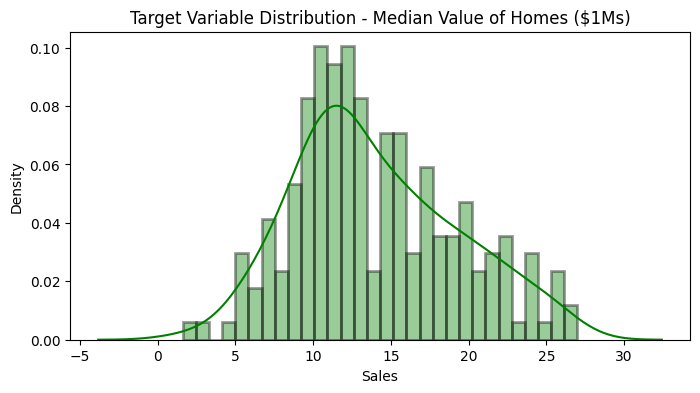

In [7]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

**Inference:**The Target Variable seems to be be normally distributed, averaging around $12$(units)

                                                Numeric Features Distribution                                                 


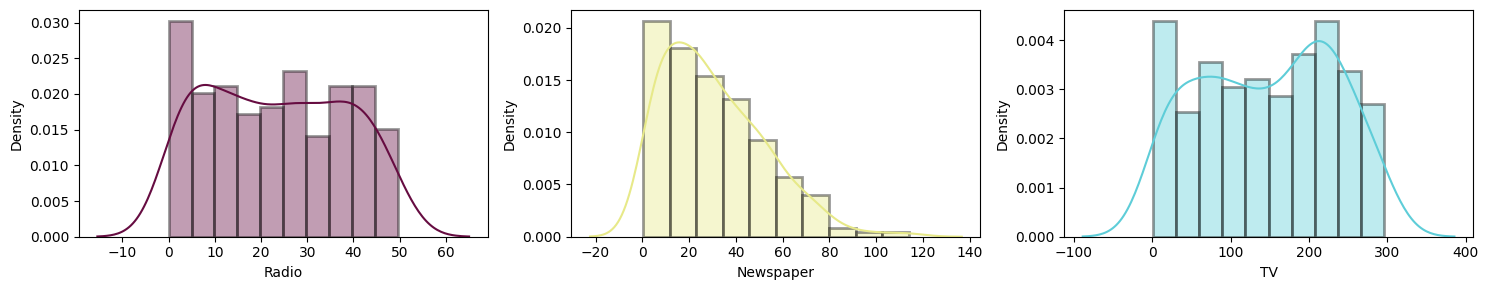

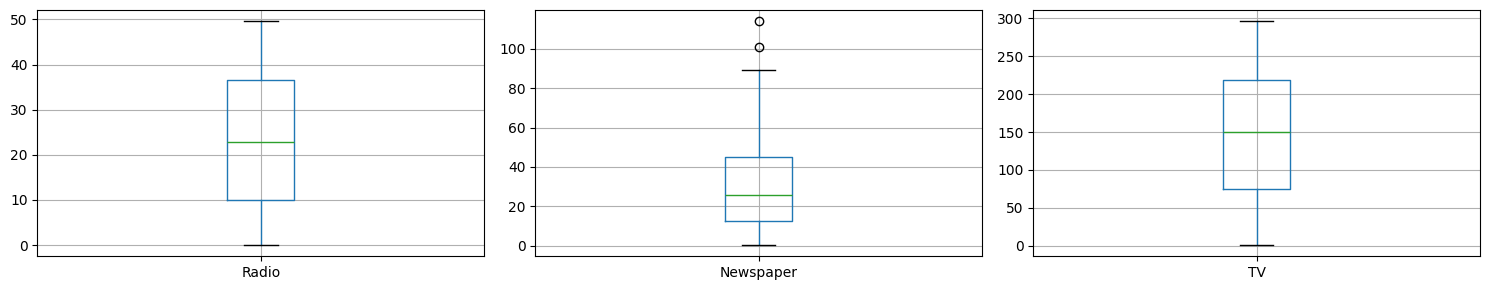

In [8]:
#Visualising the numeric features

print('\033[1mNumeric Features Distribution'.center(130))

n=3

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

**Inference:** There seem to be some outliers. let us fix these in the upcoming section...

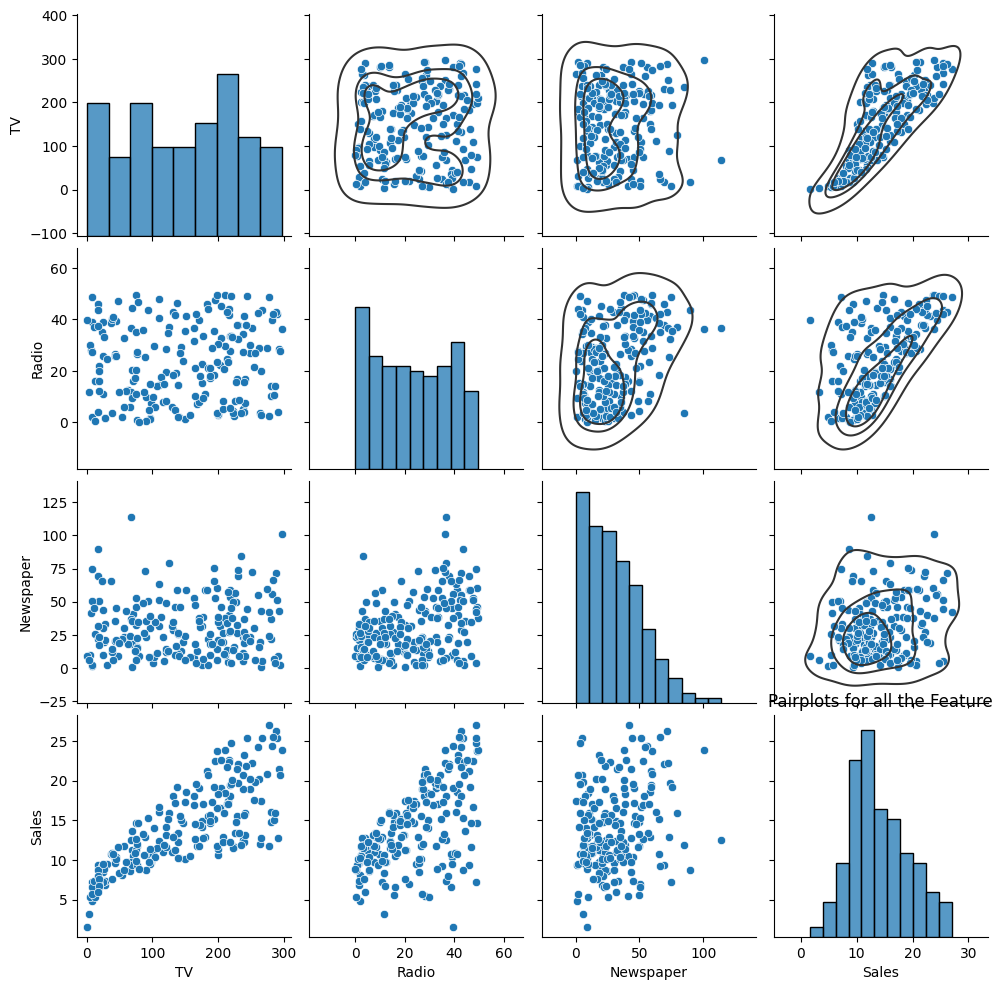

In [9]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

# <center>  Data Preprocessing

In [10]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [11]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

           Total Null Values  Percentage
TV                         0         0.0
Radio                      0         0.0
Newspaper                  0         0.0
Sales                      0         0.0


**Inference:** The datset doesn't have any inconsistant values.

In [12]:
df1 = df.copy()
df3 = df1.copy()

In [13]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9



Inference:
Before removal of outliers, The dataset had 200 samples.
After removal of outliers, The dataset now has 198 samples.


# <center>  Data Manipulation

In [14]:
#Splitting the data intro training & testing sets
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (200, 3) (200,) 
Training set  --->  (160, 3) (160,) 
Testing set   --->  (40, 3)  (40,)


In [15]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.head())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.head())

                                         Standardardization on Training set                                         


,TV,Radio,Newspaper
0,0.775229,0.029592,1.165328
1,0.338085,-0.523471,-1.311313
2,0.214759,-0.152514,0.707688
3,0.809363,-1.197938,-0.189646
4,-0.273036,-0.240195,-0.898539



                                          Standardardization on Testing set                                          


,TV,Radio,Newspaper
0,-1.510693,1.061527,0.851261
1,1.026284,0.751272,-1.181199
2,-0.107868,1.250378,0.640388
3,0.800554,0.697315,1.228141
4,1.064823,1.000825,-0.378086


# <center>  Feature Selection/Extraction

                 Correlation Matrix                


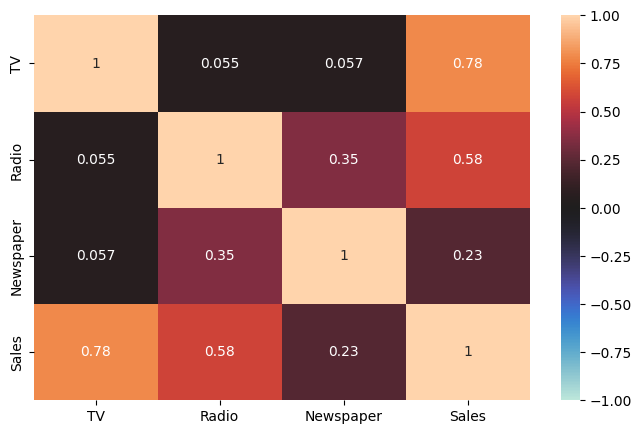

In [16]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(55))
plt.figure(figsize=[8,5])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [17]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     427.4
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           5.38e-75
Time:                        09:01:40   Log-Likelihood:                -316.74
No. Observations:                 160   AIC:                             641.5
Df Residuals:                     156   BIC:                             653.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7987      0.140     98.377      0.000      13.522      14.076
TV             4.1400      0.141     29.444      0.000       3.862       4.418
Radio          2.7533      0.153     18.012      0.000       2.451       3.055
Newspaper      0.0498      0.153      0.325      0.746      -0.253       0.352
==============================================================================
Omnibus:                       43.762   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.253
Skew:                          -1.220   Prob(JB):                     1.53e-20
Kurtosis:                       5.781   Cond. No.                         1.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Prediction

In [18]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.columns,2)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')
    plt.xlabel('Errors')

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()

## Multiple Linear Regression(MLR)

<<<-------------------- Evaluating Multiple Linear Regression Model -------------------->>>

The Coeffecient of the Regresion Model was found to be  [4.1400088  2.753257   0.04976545]
The Intercept of the Regresion Model was found to be  13.798750000000002


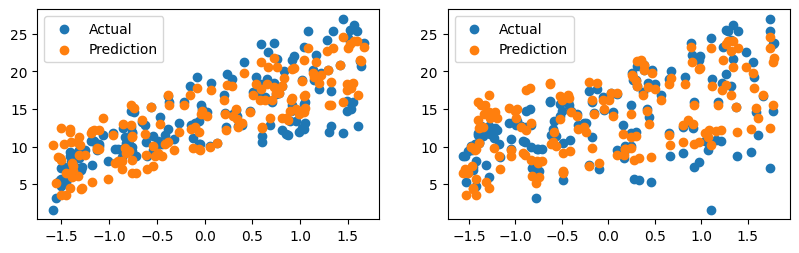



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.89152823018429
Residual Sum of Squares (RSS) on Training set  ---> 491.0581831439657
Mean Squared Error (MSE) on Training set       ---> 3.0691136446497858
Root Mean Squared Error (RMSE) on Training set ---> 1.7518885936753472

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9184369032278497
Residual Sum of Squares (RSS) on Training set  ---> 69.33171126323097
Mean Squared Error (MSE) on Training set       ---> 1.7332927815807744
Root Mean Squared Error (RMSE) on Training set ---> 1.3165457764851074

--------------------Residual Plots--------------------


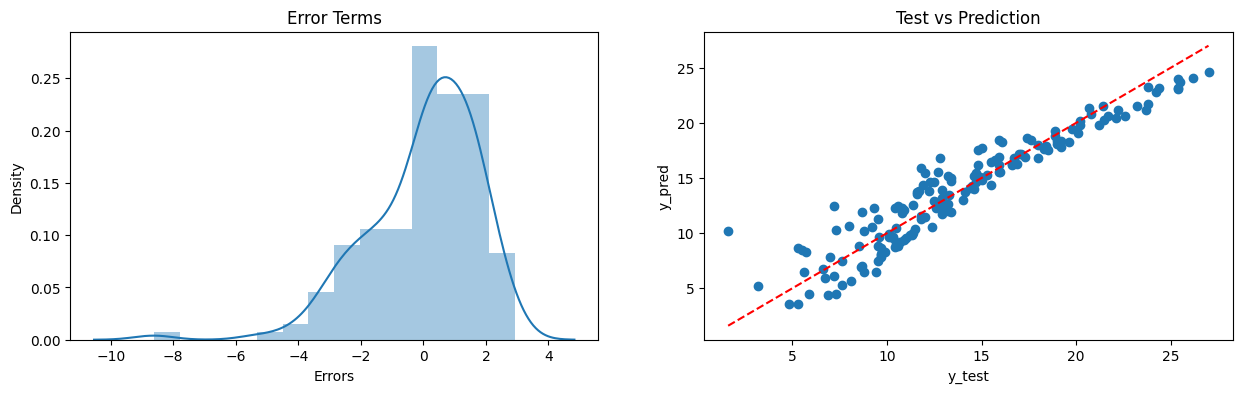

In [19]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

## Ridge Regression Model

<<<-------------------- Evaluating Ridge Regression Model -------------------->>>

The Coeffecient of the Regresion Model was found to be  [4.1400088  2.753257   0.04976545]
The Intercept of the Regresion Model was found to be  13.798750000000002


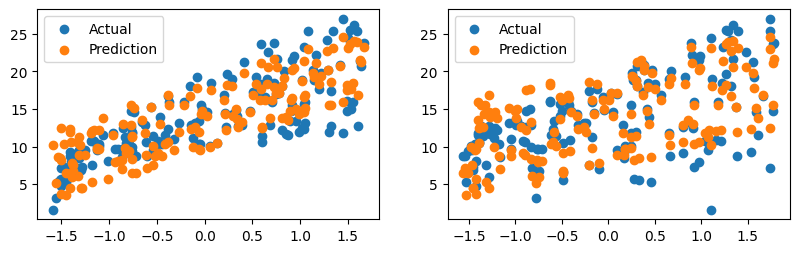



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8914923455379875
Residual Sum of Squares (RSS) on Training set  ---> 491.22063508188495
Mean Squared Error (MSE) on Training set       ---> 3.070128969261781
Root Mean Squared Error (RMSE) on Training set ---> 1.7521783497297816

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9177605423690794
Residual Sum of Squares (RSS) on Training set  ---> 69.90664352580802
Mean Squared Error (MSE) on Training set       ---> 1.7476660881452006
Root Mean Squared Error (RMSE) on Training set ---> 1.3219932254535953

--------------------Residual Plots--------------------


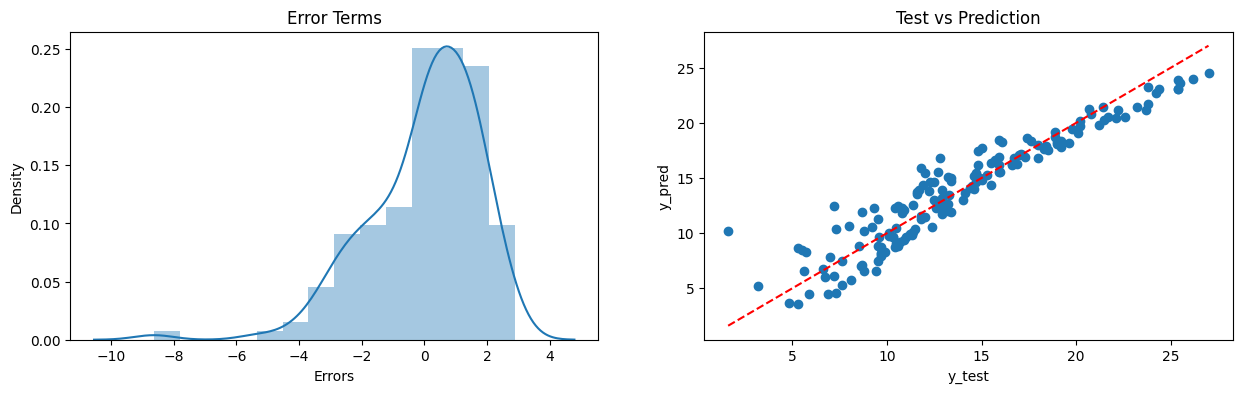

In [20]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

## Lasso Regression Model

<<<-------------------- Evaluating Lasso Regression Model -------------------->>>

The Coeffecient of the Regresion Model was found to be  [4.1400088  2.753257   0.04976545]
The Intercept of the Regresion Model was found to be  13.798750000000002


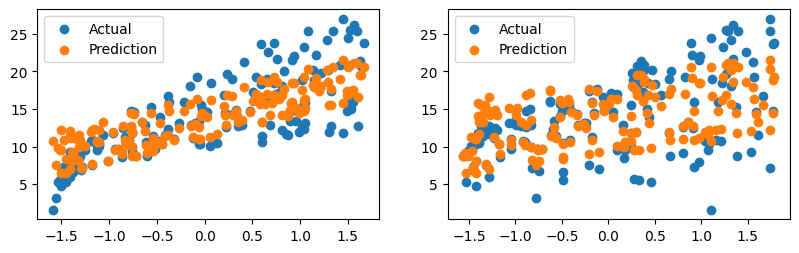



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8218836453365099
Residual Sum of Squares (RSS) on Training set  ---> 806.3433800138109
Mean Squared Error (MSE) on Training set       ---> 5.0396461250863185
Root Mean Squared Error (RMSE) on Training set ---> 2.2449156164734387

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8228423795954266
Residual Sum of Squares (RSS) on Training set  ---> 150.59066504405763
Mean Squared Error (MSE) on Training set       ---> 3.7647666261014407
Root Mean Squared Error (RMSE) on Training set ---> 1.9403006535332201

--------------------Residual Plots--------------------


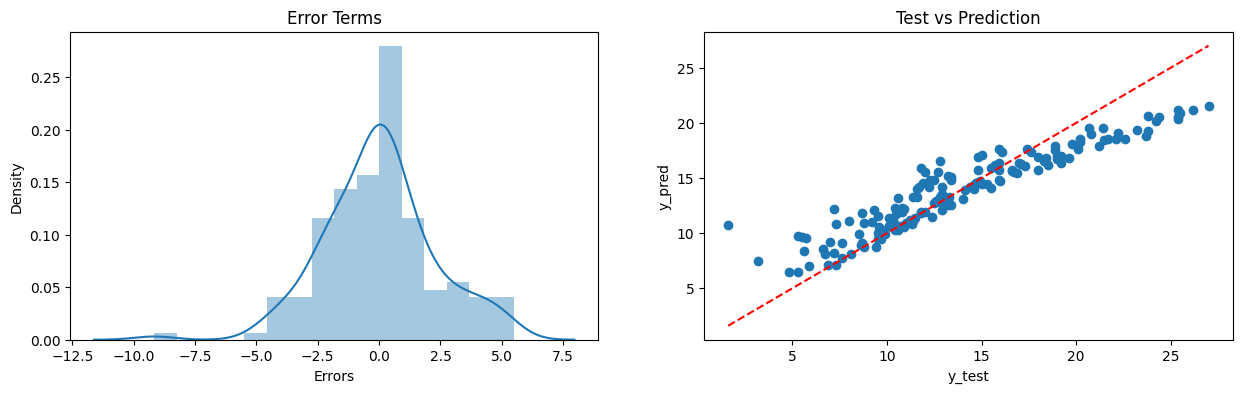

In [21]:
#Creating a Lasso Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

## Elastic-Net Regression

<<<-------------------- Evaluating Elastic-Net Regression Model -------------------->>>

The Coeffecient of the Regresion Model was found to be  [4.1400088  2.753257   0.04976545]
The Intercept of the Regresion Model was found to be  13.798750000000002


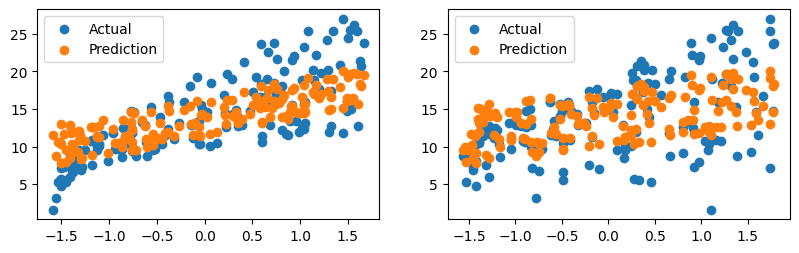



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.7339906988056573
Residual Sum of Squares (RSS) on Training set  ---> 1204.2400005625364
Mean Squared Error (MSE) on Training set       ---> 7.526500003515852
Root Mean Squared Error (RMSE) on Training set ---> 2.7434467378675045

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.7216194665629192
Residual Sum of Squares (RSS) on Training set  ---> 236.63396228665596
Mean Squared Error (MSE) on Training set       ---> 5.915849057166399
Root Mean Squared Error (RMSE) on Training set ---> 2.432251849041624

--------------------Residual Plots--------------------


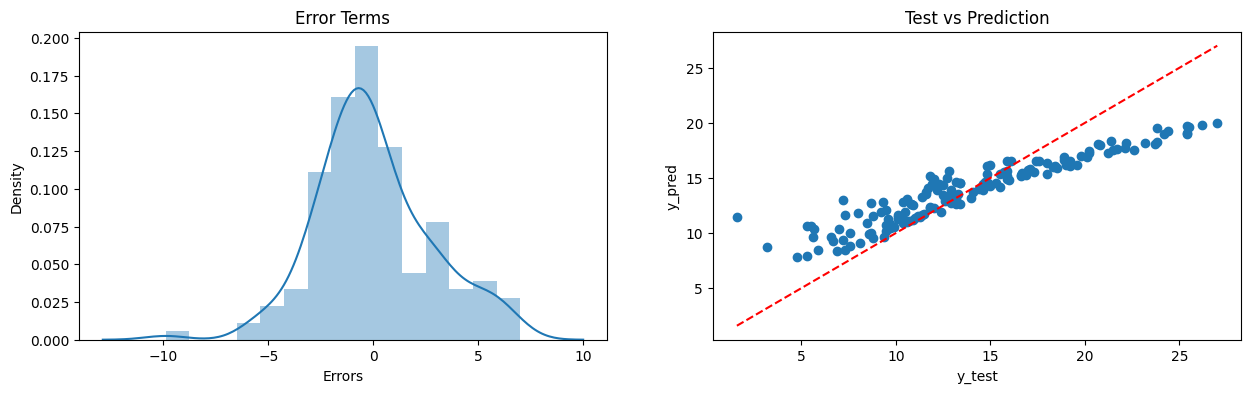

In [22]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

## Polynomial Regression Model

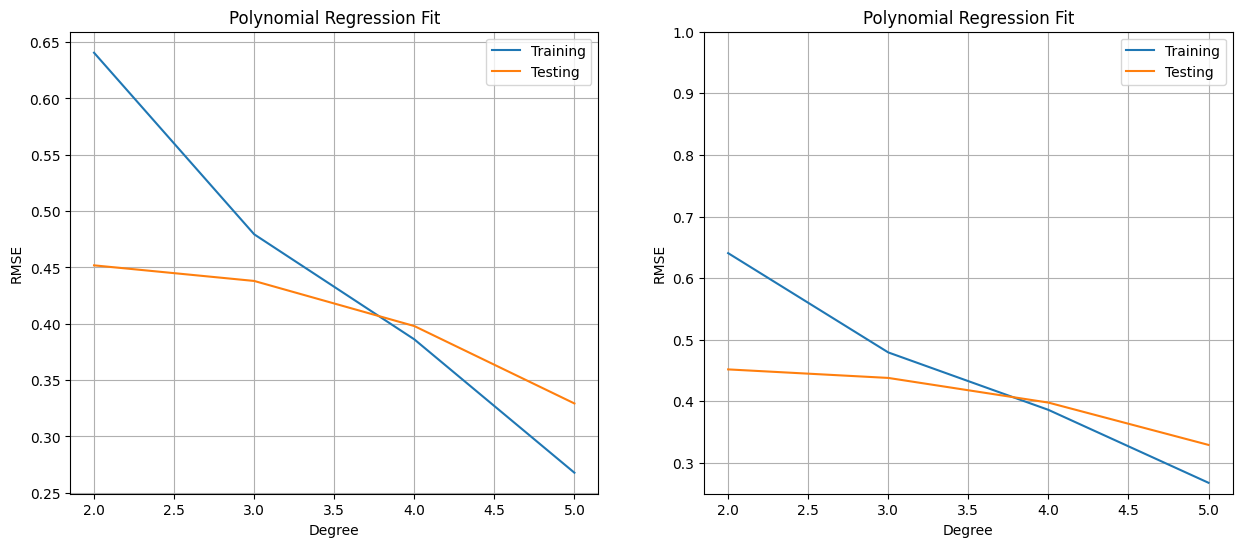

In [23]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=6

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)

    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))

    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0.25,1])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

**Inference:** We can choose 5 order polynomial regression as it gives the optimal training & testing scores...

<<<-------------------- Evaluating Polynomial Regression Model -------------------->>>

The Coeffecient of the Regresion Model was found to be  [4.1400088  2.753257   0.04976545]
The Intercept of the Regresion Model was found to be  13.798750000000002


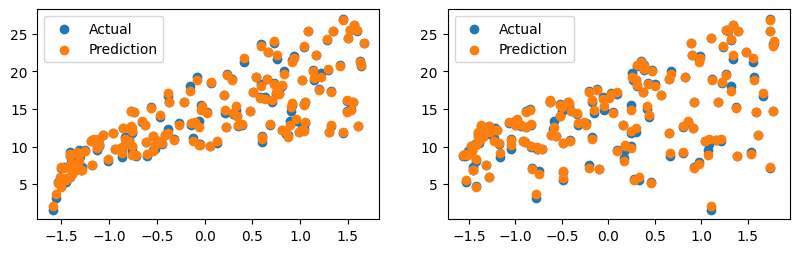



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9974660888333543
Residual Sum of Squares (RSS) on Training set  ---> 11.471167252597354
Mean Squared Error (MSE) on Training set       ---> 0.07169479532873346
Root Mean Squared Error (RMSE) on Training set ---> 0.26775883800303113

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9948991593312362
Residual Sum of Squares (RSS) on Training set  ---> 4.335907125184443
Mean Squared Error (MSE) on Training set       ---> 0.10839767812961107
Root Mean Squared Error (RMSE) on Training set ---> 0.32923802655466616

--------------------Residual Plots--------------------


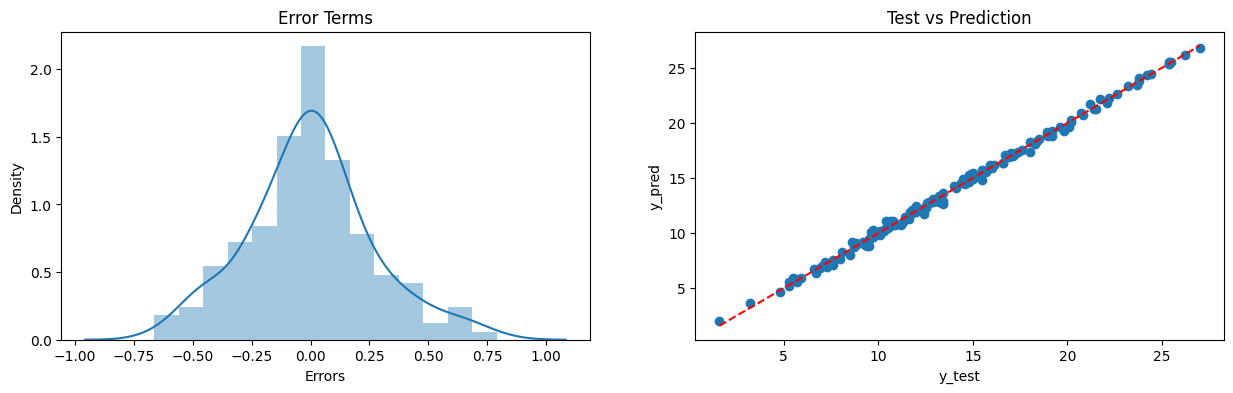

In [24]:
#Using the 5 Order Polynomial Regression model (degree=5)

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

## Comparing the Evaluation Metics of the Models

In [25]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.891528,0.918437,491.058183,69.331711,3.069114,1.733293,1.751889,1.316546
Ridge Linear Regression (RLR),0.891492,0.917761,491.220635,69.906644,3.070129,1.747666,1.752178,1.321993
Lasso Linear Regression (LLR),0.821884,0.822842,806.343380,150.590665,5.039646,3.764767,2.244916,1.940301
Elastic-Net Regression (ENR),0.733991,0.721619,1204.240001,236.633962,7.526500,5.915849,2.743447,2.432252
Polynomial Regression (PNR),0.997466,0.994899,11.471167,4.335907,0.071695,0.108398,0.267759,0.329238


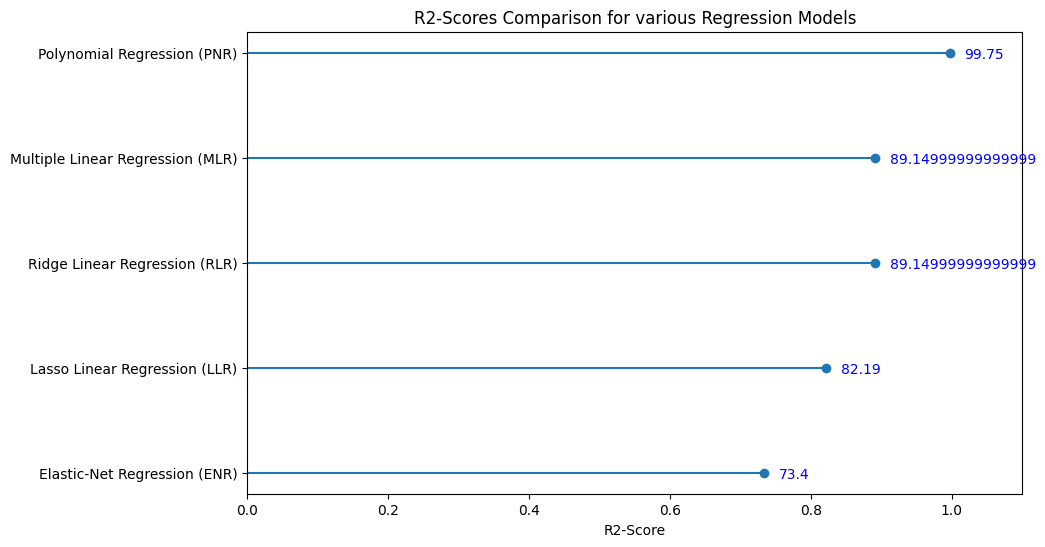

In [26]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

**Inference:** From the above plot, it is clear that the polynomial regresion models have the highest explainability power  to understand the dataset.